In [ ]:
pip install Image

📸 Wyświetlanie obrazu paszportu:


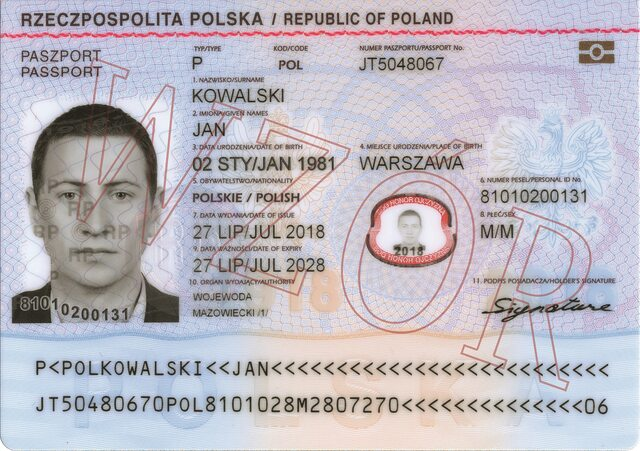

{
    "passport_number": "JT5048067",
    "full_name": "KOWALSKI JAN",
    "expiry_date": "2028-07-27",
    "confidence": 0.99
}


In [6]:
import base64
import json
from openai import OpenAI
from IPython.display import display, Image as IPythonImage
from PIL import Image
import io

client = OpenAI()

def extract_passport_data(image_path: str):
    with open("/Users/gro/Desktop/passport_test.jpg", "rb") as image_file:
        image_bytes = image_file.read()
        base64_image = base64.b64encode(image_bytes).decode("utf-8")
        print("📸 Wyświetlanie obrazu paszportu:")
        display(IPythonImage(data=image_bytes))

    tools = [
        {
            "type": "function",
            "function": {
                "name": "extract_passport_info",
                "description": "Extracts passport number, name, expiry date, and confidence from a Polish passport image.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "passport_number": {"type": "string"},
                        "full_name": {"type": "string"},
                        "expiry_date": {"type": "string", "description": "Format: YYYY-MM-DD"},
                        "confidence": {"type": "number", "minimum": 0, "maximum": 1, "description": "Confidence level between 0 and 1"}
                    },
                    "required": ["passport_number", "full_name", "expiry_date", "confidence"]
                }
            }
        }
    ]

    messages = [
        {
            "role": "system",
            "content": "Jesteś OCR AI, który analizuje polskie paszporty i zwraca dane w ustrukturyzowanej formie wraz z poziomem pewności."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Wyodrębnij numer paszportu, imię i nazwisko oraz datę ważności z tego polskiego paszportu."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        tools=tools,
        tool_choice="auto",
        max_tokens=1000,
    )

    tool_call = response.choices[0].message.tool_calls[0]
    result = json.loads(tool_call.function.arguments)

    return result

data = extract_passport_data("polski_pasport.jpg")
print(json.dumps(data, indent=4, ensure_ascii=False))